In [1]:
#Dataset link kaggle
#https://www.kaggle.com/code/kirolosatef/autism-detection-using-pre-trained-models/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from glob import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
#reading the images using glob
path='/content/drive/MyDrive/autismdata'
image=glob(path+'/*')
image

['/content/drive/MyDrive/autismdata/train',
 '/content/drive/MyDrive/autismdata/test']

In [5]:
#creating list of train and test image
train_list =list(glob(path+'/train/*'))
test_list=list(glob(path+'/test/*'))

In [6]:
train_autistic_list=list(glob(path+'/train/autistic/*'))
train_non_autistic_list=list(glob(path+'/train/non_autistic/*'))

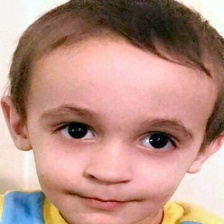

In [7]:
Image.open('/content/drive/MyDrive/autismdata/train/autistic/0001.jpg')

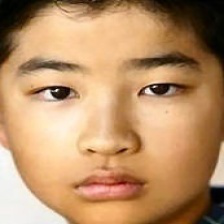

In [8]:
Image.open('/content/drive/MyDrive/autismdata/train/non_autistic/0001.jpg')

In [9]:
print(train_autistic_list[0:2])
print(train_non_autistic_list[0:2])

['/content/drive/MyDrive/autismdata/train/autistic/0966.jpg', '/content/drive/MyDrive/autismdata/train/autistic/1012.jpg']
['/content/drive/MyDrive/autismdata/train/non_autistic/0001.jpg', '/content/drive/MyDrive/autismdata/train/non_autistic/0214.jpg']


In [10]:
input_map={'autistic':train_autistic_list,'non_autistic':train_non_autistic_list}
output={'autistic':0,'non_autistic':1}

In [11]:
#preprocessing

In [12]:
x=[]
y=[]

In [13]:
for i in input_map:
  path_list=input_map[i]
  for j in path_list:
    img_array=cv2.imread(j)
    img_array=cv2.resize(img_array,(224,224)) #resizeing image
    img_array=img_array/255 #convert to 0-1
    img_array=img_array.reshape(224,224,3,1) #reshapeing dimentionality
    x.append(img_array)
    y.append(output[i])


In [14]:
#converting list to array
x=np.array(x)
y=np.array(y)

In [15]:
print(x.shape)
print(y.shape)

(2536, 224, 224, 3, 1)
(2536,)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x[0].shape

(224, 224, 3, 1)

In [18]:
from tensorflow.keras.layers import Conv3D,MaxPool3D,Dense,Flatten,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [19]:
model=Sequential()
model.add(Conv3D(filters=10,kernel_size=(2,2,1),input_shape=(224,224,3,1)))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(Dropout(0.2))
model.add(Conv3D(filters=15,kernel_size=(2,2,1),activation='relu'))
model.add(MaxPool3D(pool_size=(2,2,1)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [20]:
# model = Sequential()
# model.add(layers.Conv3D(32,(3,3,3),activation='relu',input_shape=(224,224,3,1),bias_initializer=Constant(0.01)))
# model.add(layers.Conv3D(32,(3,3,3),activation='relu',bias_initializer=Constant(0.01)))
# model.add(layers.MaxPooling3D((2,2,2)))
# model.add(layers.Conv3D(64,(3,3,3),activation='relu'))
# model.add(layers.Conv3D(64,(2,2,2),activation='relu'))
# model.add(layers.MaxPooling3D((2,2,2)))
# model.add(layers.Dropout(0.6))
# model.add(layers.Flatten())
# model.add(layers.Dense(256,'relu'))
# model.add(layers.Dropout(0.7))
# model.add(layers.Dense(128,'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1,'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 223, 223, 3, 10)   50        
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 111, 3, 10)  0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 3, 10)   0         
                                                                 
 conv3d_1 (Conv3D)           (None, 110, 110, 3, 15)   615       
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 55, 55, 3, 15)    0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 136125)            0

In [22]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [23]:
len(x_train),len(y_train)

(2028, 2028)

In [24]:
import tensorflow as tf

In [25]:
#early stopping
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
                   
)

In [26]:
a=model.fit(x_train,y_train,batch_size=250,epochs=50,validation_data=(x_test,y_test),callbacks=early_stopping)

Epoch 1/50
9/9 [==============================] - 17s 739ms/step - loss: 6.6843 - accuracy: 0.5015 - val_loss: 4.9059 - val_accuracy: 0.4862
Epoch 2/50
9/9 [==============================] - 5s 569ms/step - loss: 3.2445 - accuracy: 0.5138 - val_loss: 1.4343 - val_accuracy: 0.4862
Epoch 3/50
9/9 [==============================] - 5s 589ms/step - loss: 1.2424 - accuracy: 0.5429 - val_loss: 0.6880 - val_accuracy: 0.5551
Epoch 4/50
9/9 [==============================] - 5s 567ms/step - loss: 0.7676 - accuracy: 0.5690 - val_loss: 0.6519 - val_accuracy: 0.6161
Epoch 5/50
9/9 [==============================] - 5s 567ms/step - loss: 0.6399 - accuracy: 0.6346 - val_loss: 0.6514 - val_accuracy: 0.6319
Epoch 6/50
9/9 [==============================] - 5s 565ms/step - loss: 0.6323 - accuracy: 0.6489 - val_loss: 0.6446 - val_accuracy: 0.6516
Epoch 7/50
9/9 [==============================] - 5s 572ms/step - loss: 0.6023 - accuracy: 0.6800 - val_loss: 0.6425 - val_accuracy: 0.6535
Epoch 8/50
9/9 [===

In [27]:
a.history

{'loss': [6.684298992156982,
  3.2444629669189453,
  1.2424263954162598,
  0.7676313519477844,
  0.6399046182632446,
  0.6322559714317322,
  0.6022575497627258,
  0.5851805806159973,
  0.5712532997131348,
  0.5974319577217102,
  0.5749616622924805,
  0.5431646108627319,
  0.5621836185455322,
  0.546917200088501,
  0.5278796553611755,
  0.5548232197761536,
  0.5130246877670288,
  0.49817991256713867,
  0.4894316792488098,
  0.4924129247665405,
  0.47688090801239014,
  0.48275625705718994,
  0.47550663352012634,
  0.4630815088748932,
  0.4551638960838318,
  0.4335581660270691,
  0.4290345311164856,
  0.4145231544971466,
  0.4221869111061096,
  0.39784157276153564,
  0.39290422201156616,
  0.3814098536968231,
  0.3692023456096649,
  0.3622671365737915,
  0.3491818904876709,
  0.3565392792224884,
  0.34883615374565125,
  0.36719000339508057,
  0.3408677875995636,
  0.33853957056999207,
  0.3337850570678711,
  0.3237892687320709,
  0.3014334440231323,
  0.3009607791900635,
  0.3273814916610

In [28]:
train_acc=a.history['accuracy']
test_acc=a.history['val_accuracy']
train_loss=a.history['loss']
test_loss=a.history['val_loss']
epchs=a.epoch

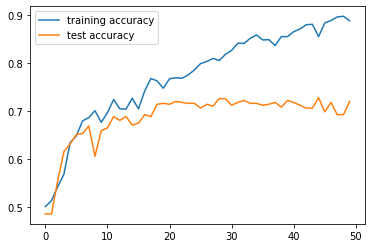

In [29]:
import matplotlib.pyplot as plt
plt.plot(epchs,train_acc,label="training accuracy")
plt.plot(epchs,test_acc,label="test accuracy")
plt.legend()

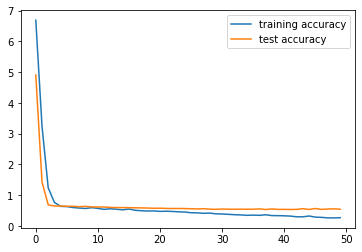

In [30]:
plt.plot(epchs,train_loss,label="training accuracy")
plt.plot(epchs,test_loss,label="test accuracy")
plt.legend()

In [31]:
from matplotlib.pyplot import imshow

1/1 [==============================] - 0s 180ms/step
autistic


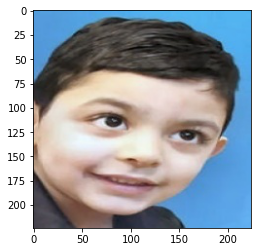

In [32]:
i_array=cv2.imread('/content/drive/MyDrive/autismdata/test/autistic/001.jpg')
img=Image.open('/content/drive/MyDrive/autismdata/test/autistic/001.jpg')
dataset=[]
i_array=cv2.resize(i_array,(224,224))
i_array.shape
np.max(i_array)
i_array=i_array/255
i_array=i_array.reshape(224,224,3,1)
dataset.append(i_array)
test=np.array(dataset)
test.shape
result=model.predict(test)
res=np.argmax(result)
imshow(img)
if res==0:
  print('autistic')
else:
  print('non_autistic')